In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

EPOCHS = 5

#wczytaj zbiór mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


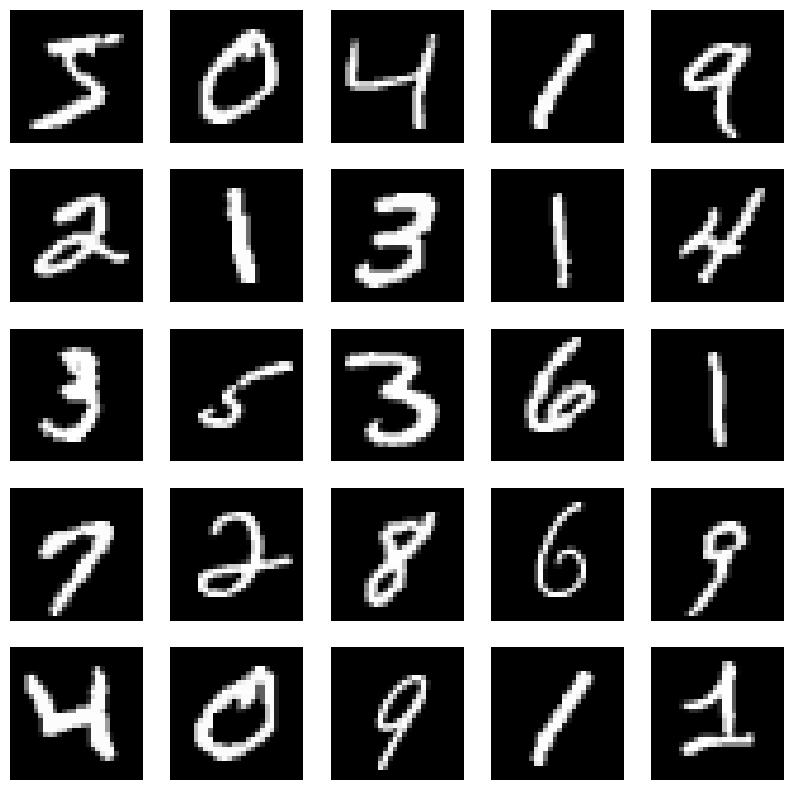

In [2]:
#dla przypomnienia, wyświetl 25 elementów zbioru treningowego 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [3]:
#znormalizuj zbiór treningowy i testestowy
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [20]:
#zbuduj sieć o 6 warstwach:
#1. flatten
#2. dense o 32 neuronach
#3. dense o mniejszej liczbie neuronów
#4. dense o takiej samej liczbie neuronów jak w punkcie 2 
#5. dense o 28*28 neuronach i sigmoidalnej warstwie aktywacji
#6. o następującej warstwie: Reshape((28,28)) aby powrócić do pierwotnego kształtu obrazu
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Reshape
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(Reshape((28,28)))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 784)               25872     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 52,064
Trainable params: 52,064
Non-trai

In [21]:
#naucz sieć
history = model.fit(x_train, x_train, epochs=EPOCHS, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 21s 8ms/step - loss: 8.9038 - accuracy: 0.1633 - val_loss: 8.5796 - val_accuracy: 0.2081
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 8.3712 - accuracy: 0.2184 - val_loss: 8.4128 - val_accuracy: 0.2229
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 8.2659 - accuracy: 0.2317 - val_loss: 8.3512 - val_accuracy: 0.2317
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 8.2274 - accuracy: 0.2356 - val_loss: 8.3247 - val_accuracy: 0.2342
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 8.2008 - accuracy: 0.2389 - val_loss: 8.2990 - val_accuracy: 0.2337


In [22]:
#zrób predykcję
predictions = model.predict(x_test)


313/313 [==============================] - 5s 3ms/step


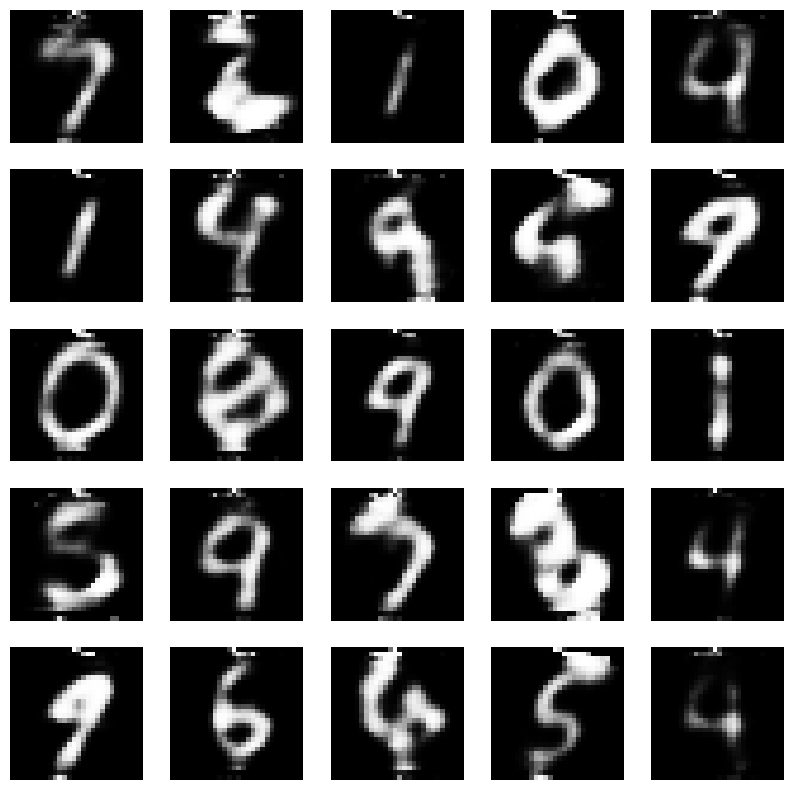

In [23]:
#wyświetl 25 elemntów ze predykowanego zbioru
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(predictions[i], cmap='gray')
    plt.axis('off')
plt.show()